In [1]:
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
#Ignore annoying warning (from sklearn and seaborn)

%matplotlib inline

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")
data = pd.DataFrame(data)

In [3]:
data.shape

(181691, 135)

### Given that an attack occurred, and someone will claim it, can we predict the correct group?

In [4]:
#get rid on unknown attacks
data = data[data.gname != 'Unknown']

In [5]:
data.shape

(98909, 135)

In [6]:
#Creating the dependent variable class
factor = pd.factorize(data['gname'])
data.gname = factor[0]
definitions = factor[1]

In [7]:
#Gets rid of all strings and related variables
data_ = data.drop(['targsubtype1_txt', 'country_txt', 'targtype1_txt', 'natlty1_txt', 'target1', 'approxdate', 
                   'city', 'targtype2_txt', 'targsubtype2_txt', 'corp2', 'target2',
                   'natlty2_txt', 'targtype3_txt', 'targsubtype3_txt', 'corp3', 
                   'target3', 'natlty3_txt', 'weaptype1_txt', 'weapsubtype1_txt',
                   'weaptype2_txt', 'weapsubtype2_txt',
                   'region_txt', 'resolution', 'location', 'summary', 'motive', 
                   'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 
                   'claim3' ,'claimmode3', 'claimmode3_txt', 'compclaim','related', 'dbsource', 
                   'scite1', 'scite2', 'scite3', 'propcomment', 'addnotes',
                   'weaptype3', 'weaptype3_txt', 'weapsubtype3' , 'weapsubtype3_txt',
                   'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
                   'weapdetail' , 'propextent_txt', 'propvalue', 'propcomment',
                   'hostkidoutcome_txt', 'ransomnote', 'ransomamtus', 'ransompaid', 
                   'ransompaidus', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
                  'alternative_txt', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt', 'corp1', 'provstate',
                  'INT_LOG', 'INT_ANY', 'INT_IDEO', 'divert', 'kidhijcountry'], axis = 1)



In [8]:
data_.shape

(98909, 61)

Text(0.5,1,'Variables Correlated With Groups')

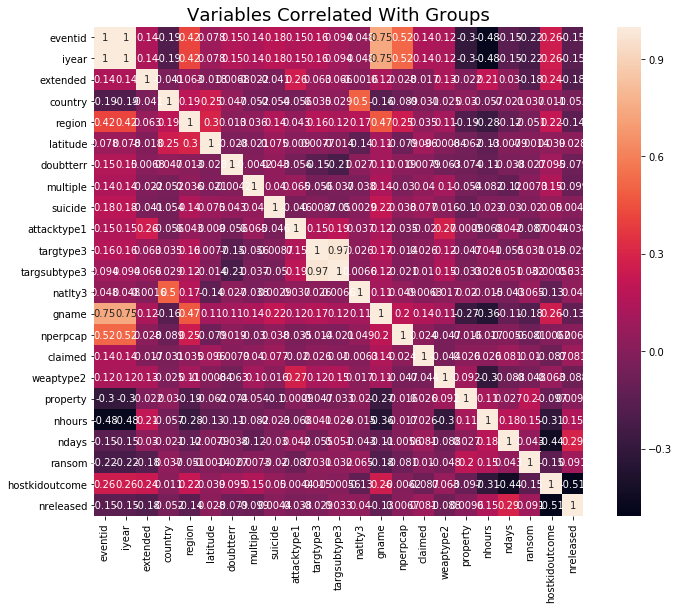

In [10]:
#Take a look at the variables that are most highly correlated with Poverty Score
corr_train = data_.corr()
#This is where you can specifiy what correlation you want to display
highest_corr = corr_train.index[abs(corr_train['gname'])>0.10]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data[highest_corr].corr(), square = True, annot = True)
plt.title('Variables Correlated With Groups', fontsize=18)

In [11]:
corr_train.query('gname > .015').shape

(33, 61)

In [12]:
lowest_corr = corr_train.index[abs(corr_train['gname'])<=0.03]

In [13]:
lowest_corr

Index(['imonth', 'iday', 'longitude', 'specificity', 'crit1', 'crit2', 'crit3',
       'success', 'attacktype2', 'natlty1', 'natlty2', 'individual',
       'weapsubtype2', 'nkillus', 'nwound', 'nwoundus', 'nwoundte',
       'ishostkid', 'nhostkid', 'nhostkidus', 'ransomamt'],
      dtype='object')

In [14]:
data__ = data_.drop(lowest_corr, 1)

In [15]:
data__.shape

(98909, 40)

In [16]:
y = data__['gname'].values
data__ = data__.drop('gname', 1)

In [17]:
data.shape

(98909, 135)

In [9]:
X = data__.fillna(0)

NameError: name 'data__' is not defined

In [19]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.62      0.80      0.70        10
          2       0.52      0.61      0.56        18
          3       1.00      1.00      1.00         7
          5       0.27      0.50      0.35         6
          6       0.70      0.90      0.79        39
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       0.86      0.75      0.80         8
         11       0.55      0.50      0.52        12
         12       0.62      0.36      0.46        22
         13       0.00      0.00      0.00         0
         14       0.81      0.94      0.87       518
         15       0.67      0.67      0.67         9
         16       0.14      0.11      0.12        28
         18       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         8
         20       0.67      0.80      0.73         5
         21      

#### Avg f1 score of .73!

Now, try on its own...

In [9]:
data_own = data_.fillna(0)
y = data_own['gname'].values
data_own = data_own.drop('gname', 1)

In [10]:
X = data_own

In [93]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

In [22]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.60      1.00      0.75         6
          2       0.46      0.33      0.39        18
          3       1.00      1.00      1.00        15
          4       1.00      0.50      0.67         2
          5       0.57      0.40      0.47        10
          6       0.52      0.83      0.64        29
          7       1.00      0.60      0.75         5
          8       0.00      0.00      0.00         1
          9       0.55      1.00      0.71         6
         10       0.79      0.85      0.81        13
         11       0.47      0.54      0.50        13
         12       0.52      0.50      0.51        28
         14       0.86      0.98      0.92       557
         15       0.86      0.86      0.86         7
         16       0.29      0.17      0.21        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

#### avg f1 of .76!

In [23]:
names = list(X)
feature_imp = sorted(list(zip( names , classifier.feature_importances_)), key=lambda x: x[1], reverse=True)

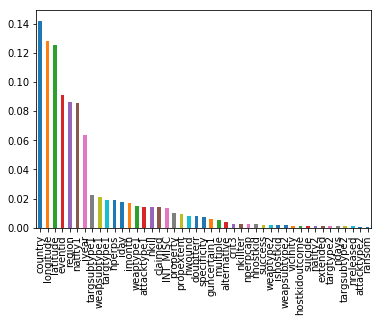

In [30]:
pd.Series([x[1] for x in feature_imp[:45]], index=[x[0] for x in feature_imp[:45]]).plot(kind='bar')

In [28]:
feature_imp[30:]

[('success', 0.002033847044994073),
 ('weaptype2', 0.0020139573981671835),
 ('ishostkid', 0.0020062575014238404),
 ('weapsubtype2', 0.0016747106449232785),
 ('vicinity', 0.001511090578996832),
 ('hostkidoutcome', 0.001480582325728232),
 ('suicide', 0.001320047611322745),
 ('natlty2', 0.001181013757338745),
 ('extended', 0.0010883631478305672),
 ('targtype2', 0.0010660648191966387),
 ('ndays', 0.0010193120600239865),
 ('targsubtype2', 0.0009871505835091633),
 ('nreleased', 0.0009859276868322555),
 ('attacktype2', 0.0008906527408181587),
 ('ransom', 0.00041322048754347017),
 ('individual', 0.0003715448779015371),
 ('crit2', 0.00033538950223699603),
 ('nhours', 0.00032579633602271713),
 ('nwoundte', 0.00023233472119615496),
 ('guncertain2', 0.0002291525926115259),
 ('ransomamt', 0.00020636430219887398),
 ('nkillus', 0.00017670273522437483),
 ('crit1', 0.00015270105123596733),
 ('nwoundus', 0.00015028510365372674),
 ('natlty3', 0.00010073421587221046),
 ('targtype3', 9.890903607299534e-05)

In [11]:
Q = X.drop(['guncertain3','attacktype3', 'targsubtype3',
           'nhostkidus', 'targtype3', 'natlty3', 'nwoundus',
           'crit1', 'nkillus', 'ransomamt', 'guncertain2', 
           'nwoundte', 'nhours', 'crit2', 'individual', 'ransom',
           'attacktype2', 'extended', 'nreleased', 'targsubtype2',
           'targtype2', 'ndays', 'natlty2', 'suicide', 'hostkidoutcome',
           'vicinity', 'weapsubtype2', 'ishostkid', 'weaptype2', 'success'], 1)

In [12]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size = 0.2, random_state = 41)

#### With Q

In [104]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.55      1.00      0.71         6
          2       0.53      0.44      0.48        18
          3       1.00      1.00      1.00        15
          4       1.00      0.50      0.67         2
          5       0.33      0.30      0.32        10
          6       0.59      0.83      0.69        29
          7       1.00      0.60      0.75         5
          8       0.00      0.00      0.00         1
          9       0.50      1.00      0.67         6
         10       0.85      0.85      0.85        13
         11       0.64      0.69      0.67        13
         12       0.58      0.54      0.56        28
         14       0.89      0.99      0.94       557
         15       0.86      0.86      0.86         7
         16       0.35      0.19      0.25        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

### Gini

In [13]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'gini', random_state = 42)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.55      1.00      0.71         6
          2       0.47      0.39      0.42        18
          3       1.00      1.00      1.00        15
          4       1.00      0.50      0.67         2
          5       0.38      0.30      0.33        10
          6       0.55      0.79      0.65        29
          7       1.00      1.00      1.00         5
          8       0.00      0.00      0.00         1
          9       0.60      1.00      0.75         6
         10       0.83      0.77      0.80        13
         11       0.55      0.46      0.50        13
         12       0.60      0.54      0.57        28
         14       0.89      0.98      0.94       557
         15       0.86      0.86      0.86         7
         16       0.25      0.17      0.20        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

#### Increase min_samples_leaf :

In [24]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', min_samples_leaf = 2, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.55      1.00      0.71         6
          2       0.42      0.28      0.33        18
          3       1.00      1.00      1.00        15
          4       0.00      0.00      0.00         2
          5       0.50      0.30      0.37        10
          6       0.57      0.97      0.72        29
          7       0.80      0.80      0.80         5
          8       0.00      0.00      0.00         1
          9       0.60      1.00      0.75         6
         10       0.91      0.77      0.83        13
         11       0.67      0.62      0.64        13
         12       0.60      0.54      0.57        28
         14       0.88      0.98      0.93       557
         15       1.00      0.86      0.92         7
         16       0.32      0.17      0.22        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

#### Increase n

In [13]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 35, criterion = 'entropy', min_samples_leaf = 2, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.60      1.00      0.75         6
          2       0.43      0.33      0.38        18
          3       1.00      1.00      1.00        15
          4       0.00      0.00      0.00         2
          5       0.43      0.30      0.35        10
          6       0.58      0.97      0.73        29
          7       0.80      0.80      0.80         5
          8       0.00      0.00      0.00         1
          9       0.60      1.00      0.75         6
         10       0.91      0.77      0.83        13
         11       0.70      0.54      0.61        13
         12       0.59      0.61      0.60        28
         14       0.87      0.98      0.93       557
         15       1.00      0.86      0.92         7
         16       0.40      0.17      0.24        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

In [23]:
param_dist = {"n_estimators": [25], "max_depth": [10], "bootstrap": ['True'], "max_leaf_nodes": [25], "min_samples_split": [2], "max_features": [10], "min_impurity_decrease": [.1, .2]}

#, "max_depth": [1, 5, 10,], "bootstrap": ['True'], "max_leaf_nodes": [10, 25], "min_samples_split": [2, 5, 10], "max_features": [10], "min_impurity_decrease": [.1, .2, .5], 
#Again, testing different hyperparameters. We will be testing different amounts of depths, impurities (similar to the cost function),
#features, and nodes.
rfregressor = RandomForestClassifier(criterion = 'entropy')
rfgridsearch = GridSearchCV(rfregressor, param_grid=param_dist, n_jobs=-1)
rfgridsearch.fit(X_train,y_train)
best_params=rfgridsearch.best_params_


In [15]:
print(best_params)

{'bootstrap': 'True', 'max_depth': 10, 'max_features': 10, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.1, 'min_samples_split': 2, 'n_estimators': 25}


In [17]:
rf1reg = RandomForestClassifier(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'], min_samples_split= best_params['min_samples_split'],
                              max_features= best_params['max_features'], min_impurity_decrease = best_params['min_impurity_decrease'],
                              max_leaf_nodes = best_params['max_leaf_nodes'], bootstrap = best_params['bootstrap'], n_jobs=-1)

In [19]:
rf1reg.fit(X_train, y_train)
#train_predictions = rf1reg.predict(X_train)
test_predictions = rf1reg.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))
#print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         6
          2       0.00      0.00      0.00        18
          3       0.00      0.00      0.00        15
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00        10
          6       0.00      0.00      0.00        29
          7       0.00      0.00      0.00         5
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         6
         10       0.00      0.00      0.00        13
         11       0.00      0.00      0.00        13
         12       0.00      0.00      0.00        28
         14       0.00      0.00      0.00       557
         15       0.00      0.00      0.00         7
         16       0.00      0.00      0.00        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

In [26]:
#Elastic Net
from sklearn.linear_model import ElasticNet, Lasso, SGDClassifier

In [27]:
eln = SGDClassifier(loss="log", penalty="elasticnet")

In [32]:
eln.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [33]:
y_pred = eln.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         6
          2       0.00      0.00      0.00        18
          3       0.00      0.00      0.00        15
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00        10
          6       0.00      0.00      0.00        29
          7       0.00      0.00      0.00         5
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         6
         10       0.00      0.00      0.00        13
         11       0.00      0.00      0.00        13
         12       0.00      0.00      0.00        28
         14       0.00      0.00      0.00       557
         15       0.00      0.00      0.00         7
         16       0.00      0.00      0.00        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

In [ ]:
#Random Forest obviously does significantly better...

In [ ]:
# Boosting + 

In [34]:

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter
import numpy as np
import pandas as pd
%matplotlib inline

In [98]:
clf = GradientBoostingClassifier()
#gridsearch = GridSearchCV(clf, {"learning_rate": [.1, .01], "n_estimators": [100], 
#                                'max_depth': [2]}, scoring='f1', n_jobs=-1)
#gridsearch.fit(X_train, y_train)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

### Unknown vs. Known

In [74]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")
data = pd.DataFrame(data)

In [75]:
#data['unknown'] = data.query('gname == Unknown')*1
data['unk'] = data['gname'] == 'Unknown'

In [76]:
data['unk'] = data['unk']*1

In [77]:
#Gets rid of all strings and related variables
data = data.drop(['targsubtype1_txt', 'country_txt', 'targtype1_txt', 'natlty1_txt', 'target1', 'approxdate', 
                   'city', 'targtype2_txt', 'targsubtype2_txt', 'corp2', 'target2',
                   'natlty2_txt', 'targtype3_txt', 'targsubtype3_txt', 'corp3', 
                   'target3', 'natlty3_txt', 'weaptype1_txt', 'weapsubtype1_txt',
                   'weaptype2_txt', 'weapsubtype2_txt',
                   'region_txt', 'resolution', 'location', 'summary', 'motive', 
                   'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 
                   'claim3' ,'claimmode3', 'claimmode3_txt', 'compclaim','related', 'dbsource', 
                   'scite1', 'scite2', 'scite3', 'propcomment', 'addnotes',
                   'weaptype3', 'weaptype3_txt', 'weapsubtype3' , 'weapsubtype3_txt',
                   'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
                   'weapdetail' , 'propextent_txt', 'propvalue', 'propcomment',
                   'hostkidoutcome_txt', 'ransomnote', 'ransomamtus', 'ransompaid', 
                   'ransompaidus', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
                  'alternative_txt', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt', 'corp1', 'provstate',
                  'INT_LOG', 'INT_ANY', 'INT_IDEO', 'divert', 'kidhijcountry', 'gname', 'claimed'], axis = 1)

In [78]:
data_unk = data.fillna(0)
y = data_unk['unk'].values
data_unk = data_unk.drop('unk', 1)

In [79]:
X = data_unk
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [80]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [81]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          0       0.86      0.88      0.87     19693
          1       0.86      0.83      0.85     16646

avg / total       0.86      0.86      0.86     36339



In [82]:
names = list(X)
feature_imp = sorted(list(zip( names , classifier.feature_importances_)), key=lambda x: x[1], reverse=True)

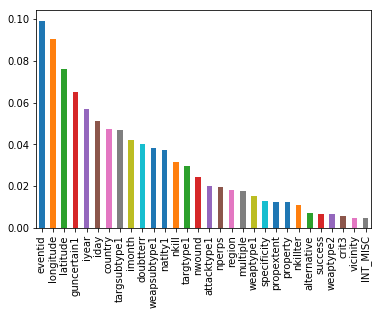

In [83]:
pd.Series([x[1] for x in feature_imp[:30]], index=[x[0] for x in feature_imp[:30]]).plot(kind='bar')

In [15]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
%matplotlib inline

### SVM

In [ ]:
clf = SVC()
#gridsearch = GridSearchCV(clf, {"C": [0.05, 0.1, 0.15], "kernel": ['rbf'], 'gamma': [0.5, 1, 1.5]}, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
print("Test Accuracy: {}".format(accuracy_score(y_test, gridsearch.predict(X_test))))

### Feature Engineering

In [2]:
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
#Ignore annoying warning (from sklearn and seaborn)

%matplotlib inline

In [3]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")
data = pd.DataFrame(data)

In [4]:
#get rid on unknown attacks
data = data[data.gname != 'Unknown']

In [5]:
#Creating the dependent variable class
factor = pd.factorize(data['gname'])
data.gname = factor[0]
definitions = factor[1]

In [6]:
#Gets rid of all strings and related variables
data_ = data.drop(['targsubtype1_txt', 'country_txt', 'targtype1_txt', 'natlty1_txt', 'target1', 'approxdate', 
                   'city', 'targtype2_txt', 'targsubtype2_txt', 'corp2', 'target2',
                   'natlty2_txt', 'targtype3_txt', 'targsubtype3_txt', 'corp3', 
                   'target3', 'natlty3_txt', 'weaptype1_txt', 'weapsubtype1_txt',
                   'weaptype2_txt', 'weapsubtype2_txt',
                   'region_txt', 'resolution', 'location', 'summary', 'motive', 
                   'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 
                   'claim3' ,'claimmode3', 'claimmode3_txt', 'compclaim','related', 'dbsource', 
                   'scite1', 'scite2', 'scite3', 'propcomment', 'addnotes',
                   'weaptype3', 'weaptype3_txt', 'weapsubtype3' , 'weapsubtype3_txt',
                   'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
                   'weapdetail' , 'propextent_txt', 'propvalue', 'propcomment',
                   'hostkidoutcome_txt', 'ransomnote', 'ransomamtus', 'ransompaid', 
                   'ransompaidus', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
                  'alternative_txt', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt', 'corp1', 'provstate',
                  'INT_LOG', 'INT_ANY', 'INT_IDEO', 'divert', 'kidhijcountry'], axis = 1)




In [7]:
data_ = data_.fillna(0)
y = data_['gname'].values
data_ = data_.drop('gname', 1)

In [8]:
data_['devastation'] = data_['nkill'] + data_['nkillter'] + data_['nwound']

In [9]:
data_['devastation+'] = data_['propextent'] + data_['devastation']/10000

In [10]:
data_['devastation+'].describe()

count    98909.000000
mean         1.182232
std          1.619783
min          0.000000
25%          0.000100
50%          0.000500
75%          3.000000
max          4.123400
Name: devastation+, dtype: float64

In [11]:
#data_['percuswound'] = data_['nwoundus']/(data_['nwound']+.000001)

In [12]:
#data_['percuskill'] = data_['nkillus']/(data_['nkill'] + .000001)

In [14]:
data_['countryweapon'] = data_['country'] + (data_['weapsubtype1']/100)

In [15]:
data_['countrydevastation+'] = data_['country'] + data_['devastation+']/10

In [16]:
data_['countryyear'] = data_['country']+(data_['iyear']-1950)/100

In [17]:
y

array([   0,    1,    2, ..., 2698,  597, 2975])

In [18]:
X = data_

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.60      1.00      0.75         6
          2       0.53      0.44      0.48        18
          3       1.00      1.00      1.00        15
          4       0.00      0.00      0.00         2
          5       0.33      0.40      0.36        10
          6       0.60      0.90      0.72        29
          7       0.80      0.80      0.80         5
          8       0.00      0.00      0.00         1
          9       0.56      0.83      0.67         6
         10       0.86      0.92      0.89        13
         11       0.64      0.69      0.67        13
         12       0.56      0.50      0.53        28
         14       0.88      0.98      0.93       557
         15       1.00      0.86      0.92         7
         16       0.40      0.22      0.29        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

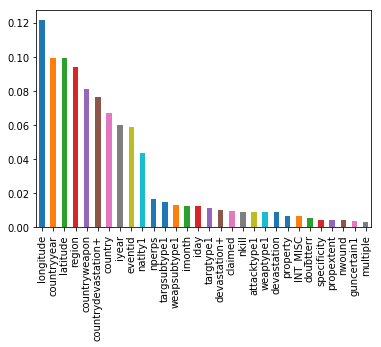

In [20]:
names = list(X)
feature_imp = sorted(list(zip( names , classifier.feature_importances_)), key=lambda x: x[1], reverse=True)
pd.Series([x[1] for x in feature_imp[:30]], index=[x[0] for x in feature_imp[:30]]).plot(kind='bar')

In [21]:
feature_imp[35:]

[('crit3', 0.0012027589060321902),
 ('ishostkid', 0.0011953557359298493),
 ('hostkidoutcome', 0.001174754424591269),
 ('nkillter', 0.0010963892730824),
 ('weapsubtype2', 0.0010752792825679998),
 ('vicinity', 0.0009949931846138266),
 ('nreleased', 0.000713719134189768),
 ('ndays', 0.0007124013938311486),
 ('targsubtype2', 0.0006860761205937367),
 ('targtype2', 0.0006568083274644674),
 ('extended', 0.0006247356812422844),
 ('natlty2', 0.000552826769218571),
 ('suicide', 0.0005404602002686941),
 ('attacktype2', 0.0004177499043136209),
 ('ransom', 0.0002971684149798362),
 ('individual', 0.00026937913925683695),
 ('crit2', 0.00024640045212506647),
 ('nhours', 0.00022437122156219154),
 ('guncertain2', 0.0001966649625665195),
 ('ransomamt', 0.0001687219331215322),
 ('nwoundte', 0.00015615132229656584),
 ('crit1', 0.0001407063455166626),
 ('nwoundus', 0.00010244266600442891),
 ('targtype3', 8.126450708254898e-05),
 ('nkillus', 7.986151137972913e-05),
 ('natlty3', 6.298733136729204e-05),
 ('tar

In [22]:
Q = X.drop(['guncertain3','attacktype3', 'targsubtype3',
           'nhostkidus', 'targtype3', 'natlty3', 'nwoundus',
           'crit1', 'nkillus', 'ransomamt', 'guncertain2', 
           'nwoundte', 'nhours', 'crit2', 'individual', 'ransom',
           'attacktype2', 'extended', 'nreleased', 'targsubtype2',
           'targtype2', 'ndays', 'natlty2', 'suicide', 'hostkidoutcome',
           'vicinity', 'weapsubtype2', 'ishostkid', 'weaptype2', 'success',
           'nhours', 'nreleased'], 1)

In [23]:

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size = 0.2, random_state = 41)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
y_pred = classifier.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.50      1.00      0.67         6
          2       0.58      0.39      0.47        18
          3       1.00      1.00      1.00        15
          4       0.00      0.00      0.00         2
          5       0.27      0.30      0.29        10
          6       0.62      0.90      0.73        29
          7       1.00      1.00      1.00         5
          8       0.00      0.00      0.00         1
          9       0.75      1.00      0.86         6
         10       0.83      0.77      0.80        13
         11       0.62      0.62      0.62        13
         12       0.57      0.46      0.51        28
         14       0.90      0.98      0.94       557
         15       1.00      0.86      0.92         7
         16       0.33      0.19      0.25        36
         17       0.00      0.00      0.00         3
         18       0.00      0.00      0.00         2
         19      

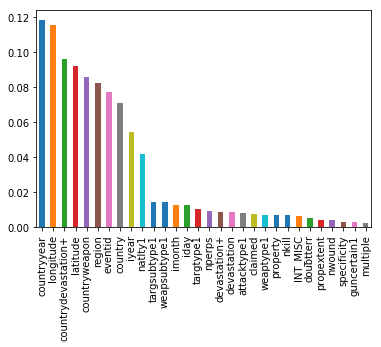

In [26]:
names = list(Q)
feature_imp = sorted(list(zip( names , classifier.feature_importances_)), key=lambda x: x[1], reverse=True)
pd.Series([x[1] for x in feature_imp[:30]], index=[x[0] for x in feature_imp[:30]]).plot(kind='bar')